**Import all the packages needed for this Notebook:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

**Import the data and check the head of the data frame:**

In [3]:
train = pd.read_csv("titanic_train.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Create a heat map to check for Null (Missing) data. As well as probing the data**

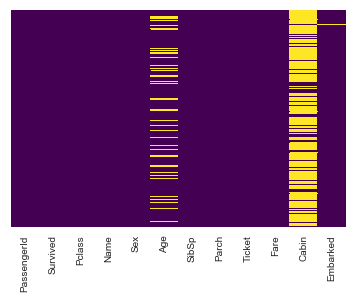

In [13]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [9]:
sns.set_style("whitegrid")

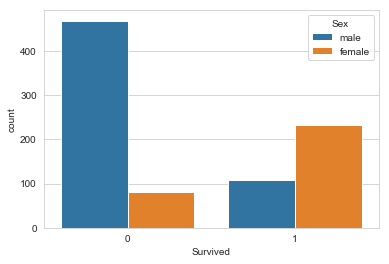

In [15]:
sns.countplot(x="Survived", data = train, hue = "Sex")
plt.show()

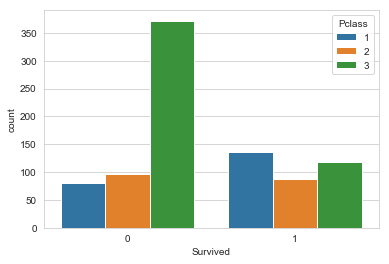

In [16]:
sns.countplot(x="Survived", data = train, hue = "Pclass")
plt.show()

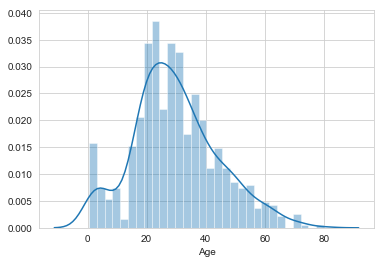

In [19]:
sns.distplot(train["Age"].dropna(), bins = 30)

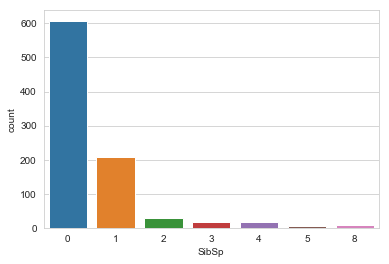

In [20]:
sns.countplot(x="SibSp", data = train)

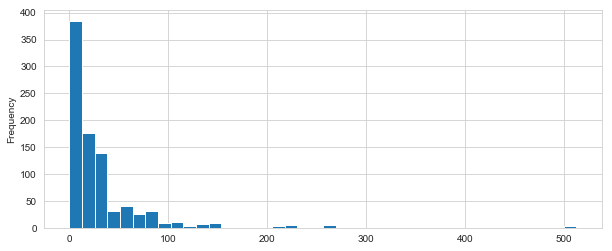

In [25]:
train["Fare"].plot.hist(bins = 40, figsize = (10,4))

In [27]:
cf.go_offline()

In [28]:
train["Fare"].iplot(kind="hist", bins = 40)

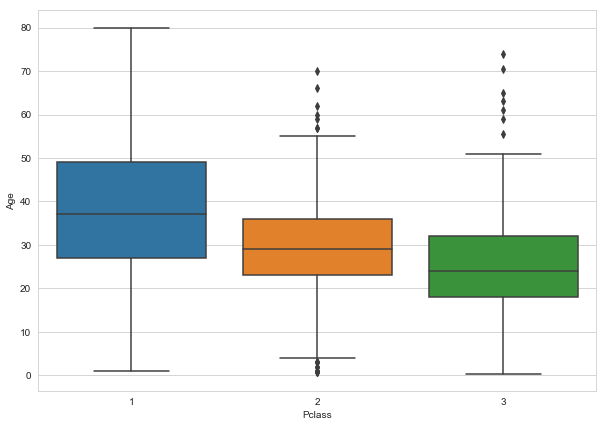

In [33]:
plt.figure(figsize = (10,7))
sns.boxplot(x="Pclass", y="Age", data=train)

**Dealing with the missing data by dropping missing rows and putting a weighted average for the age (Average for which class the person is in):**

In [50]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1] 
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [51]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis=1)

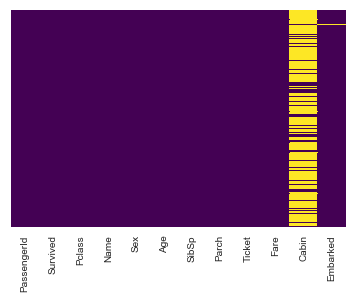

In [63]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [64]:
train.drop("Cabin",axis = 1, inplace=True)

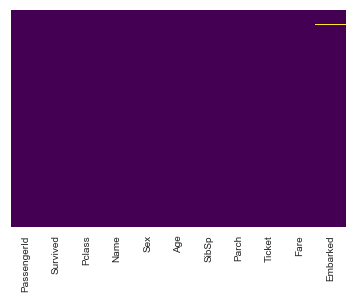

In [65]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [66]:
train.dropna(inplace=True)

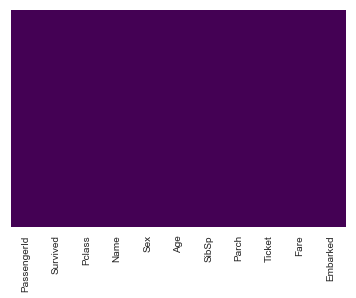

In [67]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap="viridis")

**Creating Dummy data so the algorithm can read it.**

In [70]:
sex = pd.get_dummies(train["Sex"],drop_first=True)

In [71]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [74]:
embark = pd.get_dummies(train["Embarked"],drop_first = True)

In [75]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [78]:
train = pd.concat([train,sex,embark], axis = 1)

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [80]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], inplace = True, axis = 1)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [83]:
train.drop("PassengerId", axis = 1, inplace = True)

In [84]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


**Training the Logistic Regression Model.**

In [85]:
X = train.drop("Survived", axis = 1)
y = train["Survived"] 

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [91]:
logmodel = LogisticRegression()

In [92]:
logmodel.fit(X_train, y_train)

c:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**Making Predictions from the model**

In [93]:
predictions = logmodel.predict(X_test)

**Testing the model (f1 score = 0.86) so around 86% accuracy on predicting correctly.**

In [95]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       163
           1       0.84      0.64      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.82      0.81      0.81       267



In [97]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 37,  67]], dtype=int64)